<a href="https://colab.research.google.com/github/ujin2021/ML_CrashCourse/blob/main/unit3_LinearRegression_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear regression with tf.keras

#### Linear Regression with Synthetic Data

In [ ]:
#@title Run this Colab on TensorFlow 2.x
%tensorflow_version 2.x

In [ ]:
#@title Default title text
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [ ]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


In [ ]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [ ]:
# Define the dataset
my_feature = ([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Epoch 1/10
1/1 [==============================] - 0s 491ms/step - loss: 616.0851 - root_mean_squared_error: 24.8211
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 603.2032 - root_mean_squared_error: 24.5602
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 593.9893 - root_mean_squared_error: 24.3719
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 586.3522 - root_mean_squared_error: 24.2147
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 579.6295 - root_mean_squared_error: 24.0755
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 573.5145 - root_mean_squared_error: 23.9482
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 567.8362 - root_mean_squared_error: 23.8293
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 562.4887 - root_mean_squared_error: 23.7168
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 557.4008 - root_

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


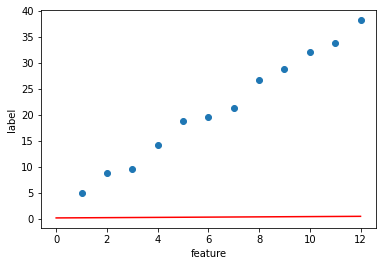

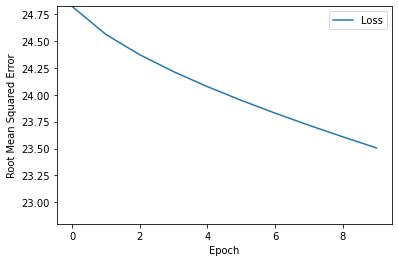

In [ ]:
# Initialize hyperparameters(learning rate, epochs, batch_size)
# Invokes the functions that build and train the model

learning_rate = 0.01
epochs = 10
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

* blue dot : actual data
* red line : output of trained model(blue dot을 따라가야 한다)
* loss 함수는 loss curve가 점점 감소하면서 flattend out되어야 하는데 그렇지 않다-> 학습이 충분히 되지 않았다

In [ ]:
# Increase the number of epoches
epochs = 1000

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


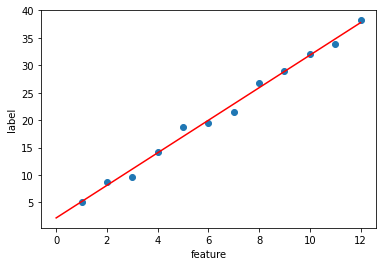

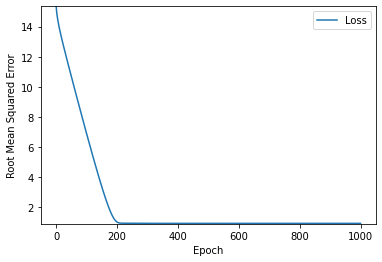

In [ ]:
# learning rate = 0.01, epochs = 1000
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

* epochs를 10에서 1000으로 올리니 빨간 선도 파란 점을 따라가고, loss함수도 flattened 되었다

In [ ]:
# Increase the learning rate

learning_rate = 100
epochs = 500
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


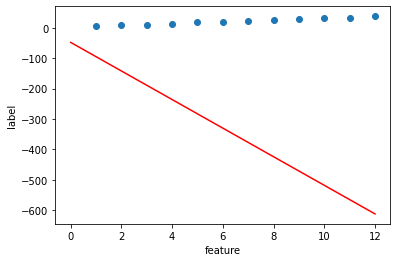

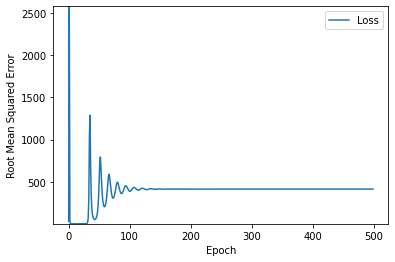

In [ ]:
# learning rate = 100, epochs = 500
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

* 빨간선이 전혀 파란점과 맞지 않는다
* loss함수도 롤러코스터 처럼 흔들린다 -> learning rate가 too high

In [ ]:
# Find the ideal combination of epochs and learning rate
learning_rate = 0.14
epochs = 70
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


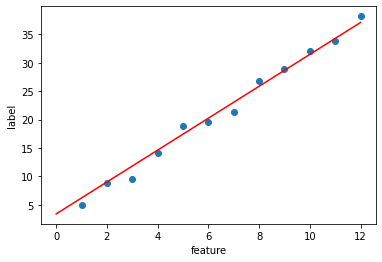

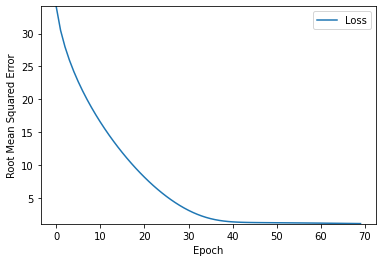

In [ ]:
# learning rate = 0.14, epochs = 70
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

* batch size : 만약 batch size가 6이다 -> system이 model의 loss value를 6개의 example을 가지고 재연산 한다

* batch size가 작을수록 더 빠르게 학습된다

* epoch : dataset의 모든 example을 처리하기에 충분한 반복 수. 만약 dataset이 12개이고, batch size가 12이면 1번, batch size가 6이면 2번이 적합

* batch size는 한번의 batch 마다 주는 data sample의 size, batch는 나눠진 data set, iteration은 epoch를나누어서 실행하는 횟수

* 메모리의 한계와 속도 저하 때문에 대부분의 경우에는 한번의 epoch에서 모든 데이터를 한꺼번에 집어넣을 수 없으므로 data를 나누어서 주게된다

* 이때 몇번 나누어 주는가를 iteration, 각 iteration마다 주는 데이터 사이즈를 batch size라고 한다

In [ ]:
learning_rate=0.05
epochs=125
my_batch_size=1 # epoch에 맞게 적합한 batch size를 고른 것. Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


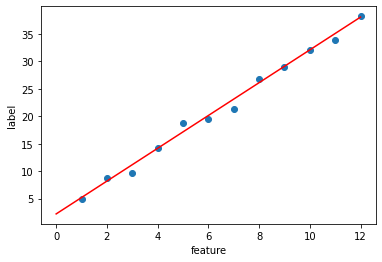

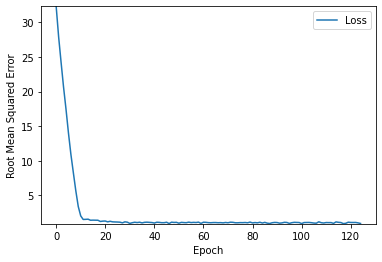

In [ ]:
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

#### Linear Regression with a Real Dataset

In [ ]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x

In [ ]:
#@title Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [19]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
# Import the dataset
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5


In [6]:
# Get statistics on the dataset
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


In [14]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


In [15]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/30
567/567 [==============================] - 1s 883us/step - loss: 1399159.6425 - root_mean_squared_error: 1092.3863
Epoch 2/30
567/567 [==============================] - 1s 882us/step - loss: 28752.1594 - root_mean_squared_error: 169.5437
Epoch 3/30
567/567 [==============================] - 1s 932us/step - loss: 28313.2729 - root_mean_squared_error: 168.2326
Epoch 4/30
567/567 [==============================] - 1s 979us/step - loss: 27547.0650 - root_mean_squared_error: 165.8634
Epoch 5/30
567/567 [==============================] - 1s 954us/step - loss: 26491.5603 - root_mean_squared_error: 162.7409
Epoch 6/30
567/567 [==============================] - 1s 943us/step - loss: 25815.3624 - root_mean_squared_error: 160.6194
Epoch 7/30
567/567 [==============================] - 1s 1ms/step - loss: 24588.5218 - root_mean_squared_error: 156.7972
Epoch 8/30
567/567 [==============================] - 1s 935us/step - loss: 23527.4873 - root_mean_squared_error: 153.3710
Epoch 9/30
567/

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


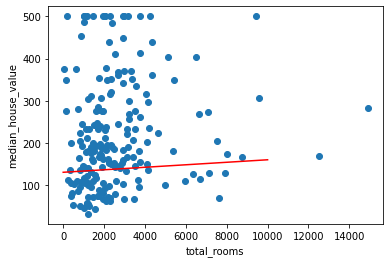

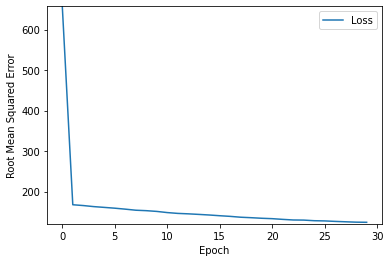

In [20]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [21]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

In [22]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             137
 3400     92             141
 3677     69             142
 2202     62             138
 2403     80             138
 5652    295             148
 3318    500             141
 2552    342             139
 1364    118             135
 3468    128             141


Epoch 1/18
5667/5667 [==============================] - 6s 965us/step - loss: 32847.9792 - root_mean_squared_error: 181.0048
Epoch 2/18
5667/5667 [==============================] - 6s 1ms/step - loss: 20979.4598 - root_mean_squared_error: 144.7516
Epoch 3/18
5667/5667 [==============================] - 6s 1ms/step - loss: 18696.4590 - root_mean_squared_error: 136.7153
Epoch 4/18
5667/5667 [==============================] - 5s 956us/step - loss: 17981.7927 - root_mean_squared_error: 134.0803
Epoch 5/18
5667/5667 [==============================] - 6s 977us/step - loss: 18469.7753 - root_mean_squared_error: 135.8980
Epoch 6/18
5667/5667 [==============================] - 5s 949us/step - loss: 18211.7632 - root_mean_squared_error: 134.9239
Epoch 7/18
5667/5667 [==============================] - 5s 948us/step - loss: 17865.3136 - root_mean_squared_error: 133.6264
Epoch 8/18
5667/5667 [==============================] - 5s 966us/step - loss: 17863.5136 - root_mean_squared_error: 133.6426
Epoc

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


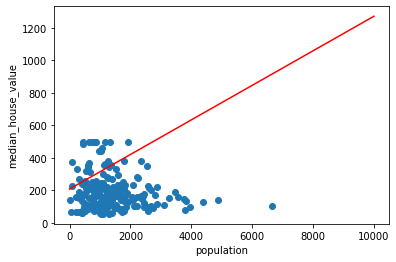

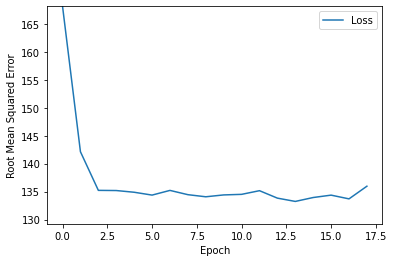

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             344
 1867     92             406
 2191     69             441
 1052     62             319
 1647     80             383
 2312    295             453
 1604    500             378
 1066    342             321
  338    118             243
 1604    128             378
 1200    187             335
  292     80             239
 2014    112             422
 1817     95             401
 1328     69             349


In [24]:
my_feature = "population" 

learning_rate = 0.05
epochs = 18
batch_size = 3

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

population and total_rooms are not useful feature

Epoch 1/24
567/567 [==============================] - 1s 887us/step - loss: 47066.2517 - root_mean_squared_error: 216.5577
Epoch 2/24
567/567 [==============================] - 1s 878us/step - loss: 22161.2931 - root_mean_squared_error: 148.7006
Epoch 3/24
567/567 [==============================] - 1s 933us/step - loss: 14721.7847 - root_mean_squared_error: 121.2855
Epoch 4/24
567/567 [==============================] - 1s 950us/step - loss: 14202.1287 - root_mean_squared_error: 119.0561
Epoch 5/24
567/567 [==============================] - 1s 920us/step - loss: 14969.8328 - root_mean_squared_error: 122.2451
Epoch 6/24
567/567 [==============================] - 1s 965us/step - loss: 14789.4994 - root_mean_squared_error: 121.5000
Epoch 7/24
567/567 [==============================] - 1s 945us/step - loss: 14703.0106 - root_mean_squared_error: 121.1673
Epoch 8/24
567/567 [==============================] - 1s 953us/step - loss: 12947.1706 - root_mean_squared_error: 113.7251
Epoch 9/24
567/5

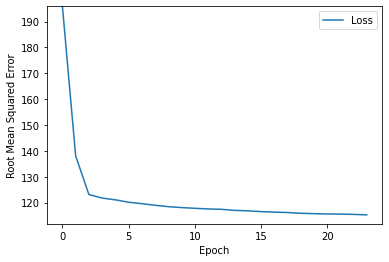

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             191
    2     92             203
    2     69             197
    2     62             213
    1     80             189
    2    295             227
    2    500             212
    2    342             225
    4    118             288
    2    128             216
    2    187             226
    3     80             236
    2    112             227
    2     95             221
    2     69             213


In [29]:
# Define a synthetic feature named rooms_per_person
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]

# Don't change the next line.
my_feature = "rooms_per_person"

# Assign values to these three hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_loss_curve(epochs, rmse)
predict_house_values(15, my_feature, my_label)

##### correlation matrix
* how each attribute's raw values relate to the other attributees' raw values
* 1.0 : perfect positive correlation(if one attributes rises, the other attributes rises)
* -0.1 : perfect negative correlation(if one attribute rises, the other attribute falls)
* 0 : no correlation

In [30]:
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982,-0.077773
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917,0.143017
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758,-0.103655
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991,0.121001
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783,0.047811
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850,-0.140277
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031,-0.034049
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871,0.232667
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000,0.206969
rooms_per_person,-0.077773,0.143017,-0.103655,0.121001,0.047811,-0.140277,-0.034049,0.232667,0.206969,1.000000


median_income and median_house_value has correlation(0.7)